In [1]:
import pandas as pd
import numpy as np
import datalib_mt5 as dlm
import matplotlib.pyplot as plt
import matplotlib as mlt
import pickle
import time
import sqlite3
import tensorflow as tf
import thread_main_loop as tml
import thread_training
import queue
import threading
import struct
import itertools
import json
import random
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import RMSprop

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
print(tf.__version__)

2.3.0


## ===========================================================================

In [2]:
dlm.insert_db()

continue(y/n)? >>>  n


current in: D:/Workspace/jupyter_workspace/my_advisor/db/temp.db


new will delete currents tables.
new set (y/n)? >>>  y


In [2]:
full_batch_1 = dlm.request_table()
full_batch_1.t_DATE.unique()

array(['2020.09.21'], dtype=object)

In [17]:
df=full_batch_1

In [21]:
import my_pre_processing_routine as mpr
shift = 10
target = 10
full_feature_list = ['t_BID','t_ASK','t_LAST','iAC','iAD','iADX','iADXWilder','iAlligator','iAMA','iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFractals','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iMACD','iOBV','iSAR','iRSI','iRVI','iStdDEV','iStochastic','iTEMA','iTriX','iWPR','iVIDyA','iVolumes']
time_step = 30
df, x_, y_= mpr.process_dataset(full_batch_1, False,  shift, target, full_feature_list, time_step, True)

In [ ]:
#df.to_pickle('m10_df')

## ===========================================================================

In [2]:
df = pd.read_pickle('m10_df')

In [22]:
df

,t_DATE,t_TIME,t_SEC,t_BID,t_ASK,t_LAST,t_VOLUME,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,iAMA,iAO,iATR,iBearsPower,iBands,iBullsPower,iCCI,iChaikin,iDEMA,iDeMarker,iEnvelopes,iForce,iFractals,iFrAMA,iIchimoku,iBWMFI,iMomentum,iMFI,iMA,iOsMA,iMACD,iOBV,iSAR,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iWPR,iVIDyA,iVolumes,t_DATE-TIME,t_LAST_Shift,t_TIME_Shift,t_LAST_DELTA,t_POS_up,t_POS_down,t_POS_const
0,2020.09.21,09:21,247,5446.5,5447.0,5447.0,1.0,0,16.295882,738788.090255,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,40.312201,5381.650,52.312201,153.529426,140.835493,5430.753602,0.962441,5399.50125,46002.730769,0.0,5442.658542,5417.00,0.234819,101.594703,93.018786,5403.45,7.466764,27.331170,-328346.0,5403.600000,87.198669,0.205607,31.365626,85.653105,5440.516108,0.000580,-14.705882,5393.505256,7921.0,2020.09.2109:21,5468.0,09:31,21.0,1.0,0.0,0.0
1,2020.09.21,09:22,003,5448.5,5449.0,5448.5,1.0,1,16.295882,743830.506922,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,40.097915,5381.725,52.097915,154.467133,695.081705,5431.126935,0.962441,5399.60850,55386.692308,0.0,5443.650565,5417.00,0.269490,101.622680,92.403191,5403.60,7.573126,27.450829,-329776.0,5403.600000,88.504849,0.208156,31.523196,86.295503,5441.039664,0.000581,-13.235294,5393.950764,9351.0,2020.09.2109:22,5469.5,09:32,21.0,1.0,0.0,0.0
2,2020.09.21,09:23,050,5450.0,5450.5,5449.5,1.0,1,16.295882,748327.673588,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,39.955058,5381.775,51.955058,155.089820,1190.968068,5431.375824,0.962441,5399.68000,69912.000000,0.0,5444.311915,5417.00,0.319258,101.641332,91.429757,5403.70,7.644035,27.530601,-332077.0,5403.600000,89.397595,0.209856,31.629683,86.723769,5441.388701,0.000581,-12.254902,5394.258660,11652.0,2020.09.2109:23,5471.0,09:33,21.5,1.0,0.0,0.0
3,2020.09.21,09:24,098,5452.0,5452.5,5452.5,2.0,0,16.295882,769225.173588,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,39.526487,5381.925,51.526487,156.946218,3453.718068,5432.122491,0.962441,5399.89450,88620.230769,0.0,5446.295962,5417.00,0.347325,101.697286,90.365273,5404.00,7.856761,27.769917,-306202.0,5403.600000,90.502098,0.214953,31.955936,88.008565,5442.435812,0.000583,-9.313725,5394.871354,14223.0,2020.09.2109:24,5475.0,09:34,22.5,1.0,0.0,0.0
4,2020.09.21,09:25,048,5458.5,5459.0,5458.5,2.0,1,16.534706,801736.318750,76.995207,70.630333,5347.660467,5435.211038,66.026471,13.714286,38.669344,5382.225,54.169344,162.711785,6989.862496,5433.615824,0.962441,5400.32350,130379.538462,0.0,5450.264057,5417.00,0.405759,101.809195,96.875251,5404.60,8.282212,28.248549,-300943.0,5403.600000,91.039017,0.223818,32.637967,90.578158,5444.530034,0.000585,-3.431373,5395.761304,19482.0,2020.09.2109:25,5478.0,09:35,19.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2020.09.21,17:45,113,5405.0,5405.5,5405.0,6.0,1,2.240588,542242.608124,27.346541,24.947379,5412.181329,5401.863375,-14.757353,8.357143,-3.276059,5401.700,2.723941,23.184713,7116.142347,5398.756545,0.550000,5408.54600,-307.230769,0.0,5401.745821,5401.00,0.768653,100.101861,51.176629,5401.95,0.885520,-4.791864,-485592.0,5410.353244,47.517489,-0.071717,3.912800,62.365591,5400.890643,-0.000184,-33.333333,5409.919106,3994.0,2020.09.2117:45,5415.0,17:55,10.0,0.0,0.0,1.0
504,2020.09.21,17:46,073,5405.5,5406.0,5405.5,1.0,1,2.308824,541933.917648,27.545920,24.783305,5412.181329,5401.872749,-14.672059,8.428571,-3.347488,5401.725,3.652512,34.447950,7114.854468,5398.880990,0.560976,5408.58175,-179.000000,0.0,5401.798905,5401.00,0.919997,100.111121,51.381922,5402.00,0.920975,-4.751978,-484932.0,5410.353244,47.992612,-0.070565,3.935337,62.105263,5401.065161,-0.000184,-30.769231,5409.922544,4654.0,2020.09.2117:46,5414.5,17:56,9.0,0.0,0.0,1.0
505,2020.09.21,17:47,087,5405.5,5406.0,5406.5,8.0,0,2.377059,544447.

In [23]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
#df = df.drop(columns=['t_LAST_Shift','t_TIME_Shift','t_POS_const','t_POS_up','t_POS_down'])
df['t_DATE-TIME']
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])
date_time

0     2020-09-21 09:21:00
1     2020-09-21 09:22:00
2     2020-09-21 09:23:00
3     2020-09-21 09:24:00
4     2020-09-21 09:25:00
              ...        
503   2020-09-21 17:45:00
504   2020-09-21 17:46:00
505   2020-09-21 17:47:00
506   2020-09-21 17:48:00
507   2020-09-21 17:49:00
Name: t_DATE-TIME, Length: 508, dtype: datetime64[ns]

In [24]:
full_feature_list = ['t_BID','t_ASK','t_LAST','iAC','iAD','iADX','iADXWilder','iAlligator','iAMA','iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFractals','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iMACD','iOBV','iSAR','iRSI','iRVI','iStdDEV','iStochastic','iTEMA','iTriX','iWPR','iVIDyA','iVolumes']
plot_cols = full_feature_list[:3]

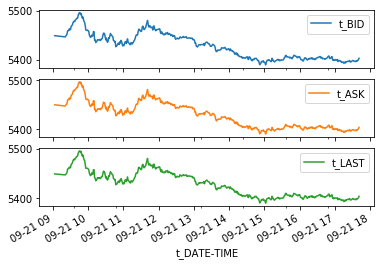

In [25]:
plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True)

In [ ]:
plot_cols = full_feature_list[3:6]
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [ ]:
plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True)

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t_BID,508.0,5426.918307,26.024354,5389.500000,5402.500000,5426.750000,5446.625000,5.496000e+03
t_ASK,508.0,5427.437008,26.027655,5390.000000,5403.000000,5427.250000,5447.125000,5.496500e+03
t_LAST,508.0,5427.186024,26.021978,5389.500000,5403.000000,5427.000000,5447.000000,5.496000e+03
t_VOLUME,508.0,2.683071,4.535195,1.000000,1.000000,1.000000,2.000000,5.000000e+01
t_TYPE,508.0,0.466535,0.499371,0.000000,0.000000,0.000000,1.000000,1.000000e+00
iAC,508.0,-2.572777,9.393710,-20.336471,-9.482647,-1.905294,3.039117,2.341765e+01
iAD,508.0,586868.701544,138876.647973,356930.481310,474232.143581,559527.544516,701061.793627,1.002589e+06
iADX,508.0,45.100335,16.792431,23.646515,30.373239,40.103988,59.102223,8.281591e+01
iADXWilder,508.0,40.141129,15.282414,24.189557,28.243106,31.956657,48.358804,7.489120e+01
iAlligator,508.0,5411.663698,26.405859,5347.660467,5405.124210,5418.514757,5432.394903,5.437943e+03


#### Volume
The last column of the data, `iVolumes`, gives the volume. Volume is strict connect to the current flow of `t_LAST`
Right now the distribution of volume data looks like this:

Text(0, 0.5, 'iVolumes')

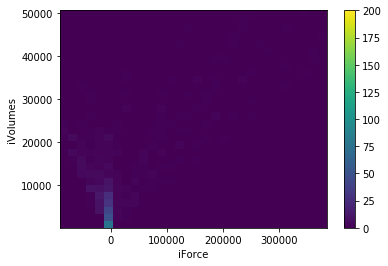

In [27]:
plt.hist2d(df['iForce'], df['iVolumes'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iForce')
plt.ylabel('iVolumes')

In [28]:
v = df['iVolumes']
#v = df.pop('iVolumes')
# Convert to radians.
v_rad = df['iForce']*np.pi / 180
#v_rad = df.pop('t_TYPE')*np.pi / 180
# Calculate the wind x and y components.
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
df=df.drop(columns=['iVolumes','iForce','t_VOLUME'])

(-44239.87497186126, 43439.269644060245, -43631.06358016557, 46878.17216287723)

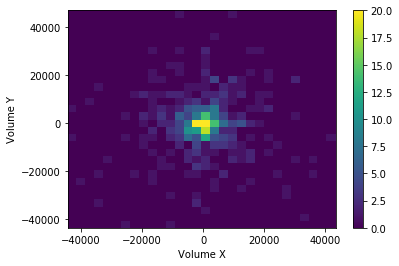

In [29]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('Volume X')
plt.ylabel('Volume Y')
ax = plt.gca()
ax.axis('tight')

#### Time

In [30]:
import datetime

timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

0      1.600691e+09
1      1.600691e+09
2      1.600691e+09
3      1.600691e+09
4      1.600691e+09
           ...     
503    1.600721e+09
504    1.600721e+09
505    1.600721e+09
506    1.600721e+09
507    1.600721e+09
Name: t_DATE-TIME, Length: 508, dtype: float64

In [31]:
day = 24*60*60
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'Time of day signal')

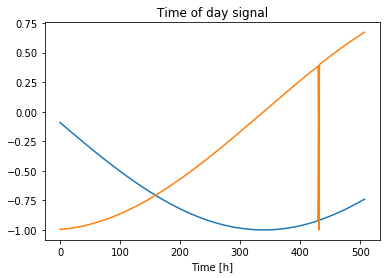

In [32]:
plt.plot(np.array(df['Day sin'])[:])
plt.plot(np.array(df['Day cos'])[:])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [33]:
df.head(3)

,t_BID,t_ASK,t_LAST,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,iAMA,iAO,iATR,iBearsPower,iBands,iBullsPower,iCCI,iChaikin,iDEMA,iDeMarker,iEnvelopes,iFractals,iFrAMA,iIchimoku,iBWMFI,iMomentum,iMFI,iMA,iOsMA,iMACD,iOBV,iSAR,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iWPR,iVIDyA,t_LAST_Shift,t_TIME_Shift,t_LAST_DELTA,t_POS_up,t_POS_down,t_POS_const,Vx,Vy,Day sin,Day cos
0,5446.5,5447.0,5447.0,0,16.295882,738788.090255,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,40.312201,5381.650,52.312201,153.529426,140.835493,5430.753602,0.962441,5399.50125,0.0,5442.658542,5417.0,0.234819,101.594703,93.018786,5403.45,7.466764,27.331170,-328346.0,5403.6,87.198669,0.205607,31.365626,85.653105,5440.516108,0.000580,-14.705882,5393.505256,5468.0,09:31,21.0,1.0,0.0,0.0,1745.551202,-7726.272840,-0.091502,-0.995805
1,5448.5,5449.0,5448.5,1,16.295882,743830.506922,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,40.097915,5381.725,52.097915,154.467133,695.081705,5431.126935,0.962441,5399.60850,0.0,5443.650565,5417.0,0.269490,101.622680,92.403191,5403.60,7.573126,27.450829,-329776.0,5403.6,88.504849,0.208156,31.523196,86.295503,5441.039664,0.000581,-13.235294,5393.950764,5469.5,09:32,21.0,1.0,0.0,0.0,5587.386167,-7498.154228,-0.095846,-0.995396
2,5450.0,5450.5,5449.5,1,16.295882,748327.673588,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,39.955058,5381.775,51.955058,155.089820,1190.968068,5431.375824,0.962441,5399.68000,0.0,5444.311915,5417.0,0.319258,101.641332,91.429757,5403.70,7.644035,27.530601,-332077.0,5403.6,89.397595,0.209856,31.629683,86.723769,5441.388701,0.000581,-12.254902,5394.258660,5471.0,09:33,21.5,1.0,0.0,0.0,3600.666018,11081.710528,-0.100188,-0.994969


In [34]:
feature_list=['t_BID', 't_ASK', 't_LAST','iCCI', 'iStdDEV','iTEMA', 'Vx', 'Vy', 'Day sin', 'Day cos', 't_LAST_DELTA','t_POS_const','t_POS_up','t_POS_down']
df = df[feature_list]
df.columns

Index(['t_BID', 't_ASK', 't_LAST', 'iCCI', 'iStdDEV', 'iTEMA', 'Vx', 'Vy',
       'Day sin', 'Day cos', 't_LAST_DELTA', 't_POS_const', 't_POS_up',
       't_POS_down'],
      dtype='object')

In [ ]:
plt.figure(figsize=(6, 80))
full_feature_list = df.columns
for index in range(len(full_feature_list)):
    plt.subplot(len(full_feature_list), 1, index+1)
    fft = tf.signal.rfft(df[full_feature_list[index]])
    f_per_dataset = np.arange(0, len(fft))

    n_samples_h = 60
    hours_per_week = 9*5
    years_per_dataset = n_samples_h/(hours_per_week)

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale('log')
    plt.ylim(0, 100000)
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks([1, 2700], labels=['1/hr', '1/min'])
    _ = plt.xlabel('Frequency (log scale)')
    plt.title(full_feature_list[index])

In [35]:
column_indices = {name: i for i, name in enumerate(df.columns)}

In [14]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [36]:
def pre_processing(df):
    df['label']=df['t_LAST_DELTA']
    df['t_BID']=(df['t_BID'] - df['iTEMA']) / df['iStdDEV']
    df['t_ASK']=(df['t_ASK'] - df['iTEMA']) / df['iStdDEV']
    df['t_LAST']=(df['t_LAST'] - df['iTEMA']) / df['iStdDEV']
    df['iCCI']=(df['iCCI']-df['iCCI'].mean()) / df['iCCI'].std()
    df['Vx']=(df['Vx']-df['Vx'].mean()) / df['Vx'].std()
    df['Vy']=(df['Vy']-df['Vy'].mean()) / df['Vy'].std()
    df = df.drop(columns=['iTEMA'])
    return df
df= pre_processing(df)  
#train_df = pre_processing(train_df)
#val_df = pre_processing(val_df)
#test_df = pre_processing(test_df)

In [37]:
df

,t_BID,t_ASK,t_LAST,iCCI,iStdDEV,Vx,Vy,Day sin,Day cos,t_LAST_DELTA,t_POS_const,t_POS_up,t_POS_down,label
0,0.190779,0.206720,0.206720,2.290065,31.365626,0.148969,-0.694286,-0.091502,-0.995805,21.0,0.0,1.0,0.0,21.0
1,0.236662,0.252523,0.236662,2.301956,31.523196,0.521733,-0.673503,-0.095846,-0.995396,21.0,0.0,1.0,0.0,21.0
2,0.272254,0.288062,0.256446,2.309853,31.629683,0.328966,1.019197,-0.100188,-0.994969,21.5,0.0,1.0,0.0,21.5
3,0.299293,0.314940,0.314940,2.333394,31.955936,0.664794,1.134381,-0.104528,-0.994522,22.5,0.0,1.0,0.0,22.5
4,0.428028,0.443348,0.428028,2.406510,32.637967,0.937903,1.539509,-0.108867,-0.994056,19.5,0.0,1.0,0.0,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1.050234,1.178020,1.050234,0.637116,3.912800,0.214068,0.299323,-0.751840,0.659346,10.0,1.0,0.0,0.0,10.0
504,1.126927,1.253981,1.126927,0.779949,3.935337,-0.471894,0.002209,-0.748956,0.662620,9.0,1.0,0.0,0.0,9.0
505,1.024275,1.149621,1.274967,0.966240,3.988969,-0.488682,-0.197946,-0.746057,0.665882,8.5,1.0,0.0,0.0,8.5
506,1.611313,1.728684,1.728684,1.498261,4.259988,-0.356630,-0.504803,-0.743145,0.669131,5.5,1.0,0.0,0.0,5.5


## =============================================================
## =============================================================

In [2]:
dlm.insert_db()

continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  n


current in: D:/Workspace/jupyter_workspace/my_advisor/db/WDO-M10_20200810_20200828.sqlite


new will delete currents tables.
new set (y/n)? >>>  n


In [2]:
dataset = dlm.request_table()
#test_dataset = dlm.request_table('temp_test_db', 'market_data_ticks')

In [ ]:
test_dataset = dlm.request_table()

In [3]:
dataset.t_DATE.unique()

array(['2020.09.03', '2020.09.04'], dtype=object)

In [17]:
shift = 10
target = 10
#feature_list = ['iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFrAMA']
x_matrix_size = 30
#feature_list = ['t_LAST','iAD','iRSI','iStochastic','iADX','iOBV','iMACD','iForce','iVolumes','iMFI']
#feature_list = ['t_BID','t_ASK','t_LAST','iAC','iAD','iADX','iADXWilder','iAlligator','iAMA','iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFractals','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iMACD','iOBV','iSAR','iRSI','iRVI','iStdDEV','iStochastic','iTEMA','iTriX','iWPR','iVIDyA','iVolumes']
#feature_list = ['iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFrAMA','iBWMFI','iOsMA','iMACD']

In [ ]:
test_dataset

In [ ]:
test_dataset = dataset[dataset['t_TIME']<'14:00']
test_dataset = test_dataset.set_index(np.arange(len(test_dataset)))

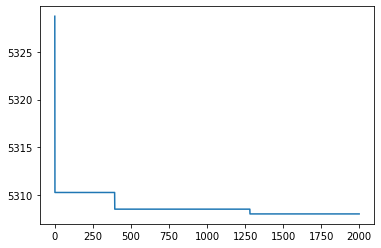

In [291]:
x=dataset.iloc[:2000,27]
plt.plot(np.arange(len(x)),x[:])

## =================================================================

In [5]:
len(feature_list)

9

In [6]:
#ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
x_Mn = dataset
x_Mn['t_DATE-TIME'] = x_Mn['t_DATE'] + x_Mn['t_TIME']
x_Mn = x_Mn.drop_duplicates(subset=['t_DATE-TIME'])
#x_Mn = x_Mn.set_index('t_DATE-TIME')
x_Mn = x_Mn.set_index(np.arange(len(x_Mn)))
x_Mn['t_LAST_Shift'] = x_Mn['t_LAST'].shift(-shift)
x_Mn['t_TIME_Shift'] = x_Mn['t_TIME'].shift(-shift)
x_Mn['t_LAST_DELTA'] = x_Mn['t_LAST'] - x_Mn['t_LAST_Shift']
x_Mn = x_Mn.dropna()

for index, row in x_Mn.iterrows():
    if row['t_LAST_DELTA'] > target:
        x_Mn.loc[index,'t_POS_up'] = 1
        x_Mn.loc[index,'t_POS_down'] = 0
        x_Mn.loc[index,'t_POS_const'] = 0
    elif row['t_LAST_DELTA'] < -target:
        x_Mn.loc[index,'t_POS_down'] = 1
        x_Mn.loc[index,'t_POS_up'] = 0
        x_Mn.loc[index,'t_POS_const'] = 0
    else:
        x_Mn.loc[index,'t_POS_const'] = 1
        x_Mn.loc[index,'t_POS_up'] = 0
        x_Mn.loc[index,'t_POS_down'] = 0

In [8]:
x_Mn=x_Mn[x_Mn['t_TIME']<'14:00']
x_Mn

,t_DATE,t_TIME,t_SEC,t_BID,t_ASK,t_LAST,t_VOLUME,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,iAMA,iAO,iATR,iBearsPower,iBands,iBullsPower,iCCI,iChaikin,iDEMA,iDeMarker,iEnvelopes,iForce,iFractals,iFrAMA,iIchimoku,iBWMFI,iMomentum,iMFI,iMA,iOsMA,iMACD,iOBV,iSAR,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iWPR,iVIDyA,iVolumes,t_DATE-TIME,t_LAST_Shift,t_TIME_Shift,t_LAST_DELTA,t_POS_const,t_POS_up,t_POS_down
0,2020.08.10,09:05,093,5423.5,5424.0,5423.5,1.0,1,3.970588,1.010346e+06,18.239431,18.508609,5424.631021,5429.410395,4.560294,9.071429,-7.376303,5427.525,9.623697,7.299270,-2679.886984,5430.831194,0.623932,5433.14200,-10076.000000,0.0,5427.356992,5430.00,0.501935,99.907894,36.427225,5428.00,0.811465,2.225075,495090.0,5419.945438,47.685062,0.102775,6.193696,51.798561,5431.452674,0.000027,-71.666667,5420.971868,20152.0,2020.08.1009:05,5419.5,09:15,4.0,1.0,0.0,0.0
1,2020.08.10,09:06,071,5421.5,5422.0,5421.5,4.0,1,3.936471,1.000479e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-7.590588,5427.425,9.909412,-3.261123,-3947.916396,5430.333416,0.618644,5432.99900,-13456.807692,0.0,5427.308224,5430.00,0.511596,99.871051,36.301022,5427.80,0.669648,2.065530,494661.0,5419.945438,46.551581,0.098563,6.273506,49.285714,5430.754600,0.000026,-78.333333,5420.962638,20581.0,2020.08.1009:06,5410.5,09:16,11.0,0.0,1.0,0.0
2,2020.08.10,09:07,030,5428.5,5429.0,5429.0,1.0,0,3.936471,1.041720e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-8.662017,5427.800,8.837983,27.711797,1375.856331,5432.200083,0.618644,5433.53525,-2072.615385,0.0,5427.491103,5430.00,0.455729,100.009211,34.511246,5428.55,1.201462,2.663821,488298.0,5419.945438,51.107176,0.113963,6.130661,60.000000,5433.372377,0.000030,-53.333333,5420.997643,26944.0,2020.08.1009:07,5408.5,09:17,20.5,0.0,1.0,0.0
3,2020.08.10,09:08,001,5425.0,5425.5,5425.0,5.0,1,3.936471,1.006114e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-8.090588,5427.600,9.409412,11.460856,-3220.998214,5431.204527,0.618644,5433.24925,-11728.461538,0.0,5427.393567,5430.00,0.460063,99.935525,33.590583,5428.15,0.917828,2.344733,484748.0,5419.945438,48.572070,0.105749,6.153454,54.285714,5431.976229,0.000028,-66.666667,5420.969177,30494.0,2020.08.1009:08,5409.0,09:18,16.0,0.0,1.0,0.0
4,2020.08.10,09:09,013,5419.0,5419.5,5419.5,3.0,0,3.731765,9.701307e+05,17.797412,18.024343,5424.631021,5429.376774,4.261765,9.321429,-10.304874,5427.325,10.195126,-23.956194,-7696.245664,5429.835638,0.588710,5432.85600,-28963.846154,0.0,5427.259456,5430.00,0.515454,99.834208,32.290619,5427.60,0.527831,1.905986,479382.0,5445.000000,45.470734,0.093878,6.382153,48.630137,5430.056526,0.000025,-85.000000,5420.939686,35860.0,2020.08.1009:09,5412.5,09:19,7.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10492,2020.09.10,12:02,108,5298.0,5298.5,5298.0,3.0,1,7.286765,-3.476263e+05,28.252438,18.493285,5297.369210,5292.909365,-3.120588,12.392857,5.450631,5294.225,12.450631,113.510354,7635.810389,5291.086565,0.563025,5293.71700,469.923077,0.0,5293.535679,5289.75,0.231080,100.018879,42.931371,5287.75,2.293146,-1.653431,-862507.0,5273.866200,53.028329,0.070861,11.490730,78.260870,5292.965442,-0.000084,-26.086957,5299.794714,6109.0,2020.09.1012:02,5292.0,12:12,6.0,1.0,0.0,0.0
10493,2020.09.10,12:03,043,5294.0,5294.5,5294.0,1.0,1,7.047941,-3.608860e+05,28.252438,18.493285,5297.369210,5292.899761,-3.419118,12.642857,2.522059,5294.025,13.022059,93.526171,6402.628570,5290.091009,0.563025,5293.43100,-2102.769231,0.0,5292.996125,5289.75,0.347619,99.943364,41.032551,5287.35,2.009512,-1.972519,-865510.0,5273.866200,50.317191,0.065260,11.458048,74.396135,5291.569294,-0.000086,-37.681159,5299.686761,9112.0,2020.09.1012:03,5291.0,12:13,3.0,1.0,0.0,0.0
10494,2020.09.10,12:04,223,5295.0,5295.5,5295.5,2.0,0,7.013824,-3.534767e+05,28.252438,18.493285,5297

In [7]:
x_Mn=x_Mn.set_index(np.arange(len(x_Mn)))

In [8]:
len(x_Mn[x_Mn['t_POS_up']==1])

48

## ==============================================================

## ==============================================================

In [38]:
y=df[['t_POS_up','t_POS_down','t_POS_const']]

In [39]:
y.loc[0]

t_POS_up       1.0
t_POS_down     0.0
t_POS_const    0.0
Name: 0, dtype: float64

In [41]:
#y=x_Mn['t_LAST_DELTA']
feature_list=['t_BID', 't_ASK', 't_LAST','iCCI', 'iStdDEV', 'Vx', 'Vy', 'Day sin', 'Day cos', 't_LAST_DELTA']
x=df[feature_list]

x_matrix = []
y_matrix = y.loc[time_step:]
y_values_matrix = []

y_matrix = pd.DataFrame(y_matrix)

for index, row in y_matrix.iterrows():
    x_matrix.append(x[index-time_step:index])
    y_values_matrix.append(row.values)

In [42]:
x_values_matrix = []
for element in x_matrix:
    x_values_matrix.append(element.values)

In [43]:
x_values_matrix = np.array(x_values_matrix)
y_values_matrix = np.array(y_values_matrix)

In [89]:
x_processed=[]
y_processed=[]
aux=0
for i in range(len(y_values_matrix)):
    if np.array_equal(y_values_matrix[i],np.array([1,0,0])):
        x_processed.append(x_values_matrix[i])
        y_processed.append(y_values_matrix[i])
    if np.array_equal(y_values_matrix[i],np.array([0,1,0])):
        x_processed.append(x_values_matrix[i])
        y_processed.append(y_values_matrix[i])
    if np.array_equal(y_values_matrix[i],np.array([0,0,1])):
        if aux==60:
            x_processed.append(x_values_matrix[i])
            y_processed.append(y_values_matrix[i])
            aux=0
        else:
            aux+=1

In [99]:
x_processed=x_values_matrix
y_processed=y_values_matrix

In [90]:
up=0
down=0
const=0
for i in range(len(y_processed)):
    if np.array_equal(y_processed[i],np.array([1,0,0])):
        up+=1
    if np.array_equal(y_processed[i],np.array([0,1,0])):
        down+=1
    if np.array_equal(y_processed[i],np.array([0,0,1])):
        const+=1
print(up)
print(down)
print(const)

27
40
6


In [100]:
x_processed=np.array(x_processed)
y_processed=np.array(y_processed)

In [60]:
len(y_processed)

478

## Train test split

In [68]:
split =int(len(x_processed)*0.7)
print(split)

334


In [69]:
#train_X, test_X, train_y, test_y = train_test_split(x_processed, y_processed, random_state = 0)
train_X, test_X, train_y, test_y = x_processed[:split], x_processed[split:], y_processed[:split], y_processed[split:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(334, 30, 10) (334, 3) (144, 30, 10) (144, 3)


In [ ]:
train_y=np.squeeze(train_y,axis=-1)
test_y=np.squeeze(test_y,axis=-1)

In [ ]:
print(train_X.shape, train_y_scaled.shape, test_X.shape, test_y_scaled.shape)

In [ ]:
scaler = MinMaxScaler()
test_y_scaled = scaler.fit_transform(test_y.reshape(-1,1))
train_y_scaled = scaler.fit_transform(train_y.reshape(-1,1))

In [ ]:
test_y_scaled = np.squeeze(test_y_scaled,axis=-1)
train_y_scaled = np.squeeze(train_y_scaled,axis=-1)

## Over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE('minority')

In [ ]:
train_X_squeeze=train_X.reshape(len(train_X),len(train_X[0]) * len(train_X[0][0]))
print(train_X_squeeze.shape)

In [ ]:
#layer = tf.keras.layers.LayerNormalization(axis=1)
#output = layer(train_X[rand])

In [ ]:
train_X_os, train_y_os = smote.fit_sample(train_X_squeeze, train_y)
print(train_X_os.shape, train_y_os.shape)

In [ ]:
train_X_os, train_y_os = smote.fit_sample(train_X_os, train_y_os)

In [ ]:
print(train_X_os.shape, train_y_os.shape)

In [ ]:
up=0
down=0
const=0
for i in range(len(train_y_os)):
    if np.array_equal(train_y_os[i],np.array([1,0,0])):
        up+=1
    if np.array_equal(train_y_os[i],np.array([0,1,0])):
        down+=1
    if np.array_equal(train_y_os[i],np.array([0,0,1])):
        const+=1
print(up)
print(down)
print(const)

In [ ]:
train_X_os = train_X_os.reshape(len(train_X_os), len(train_X[0]), len(train_X[0][0]))
print(train_X_os.shape, train_y_os.shape)

## Visualize

In [ ]:
x_processed

In [40]:
ready = False


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


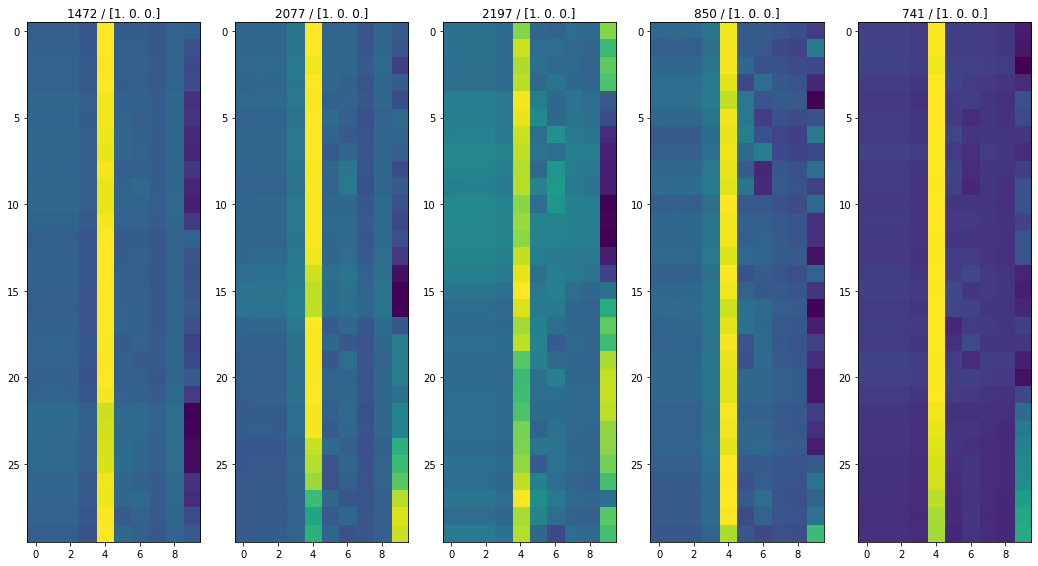

In [41]:
#plt.imshow(train_X[index], norm=norm)
#norm = mlt.colors.Normalize(vmin=0.,vmax=1.)
layer = tf.keras.layers.LayerNormalization(axis=1)
fig=plt.figure(figsize=(18,30))
for i in range(5):
    while (not ready):
        rand = random.randint(0, len(train_y)-1)
        if np.array_equal(train_y[rand],[1.0, 0., 0.]):
            plt.subplot(1,5,i+1)
            plt.subplot(1,5,i+1)
            
            output = layer(train_X[rand])
            plt.imshow(output)
            #plt.imshow(train_X[rand], norm=norm)
            plt.title(str(rand)+' / '+str(train_y[rand]))
            ready = True
    ready=False


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


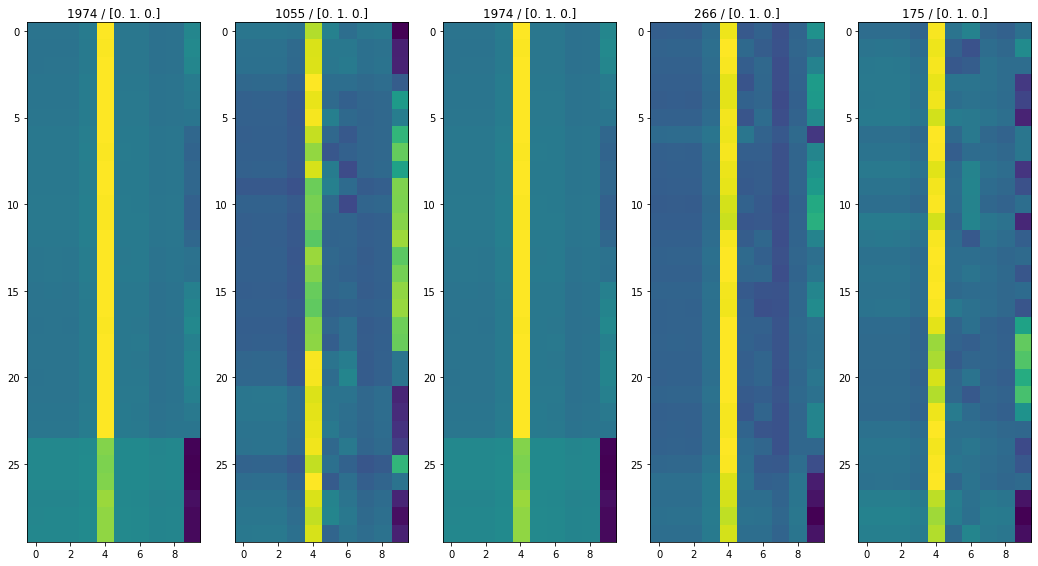

In [42]:
#plt.imshow(train_X[index], norm=norm)
#norm = mlt.colors.Normalize(vmin=0.,vmax=1.)
layer = tf.keras.layers.LayerNormalization(axis=1)
fig=plt.figure(figsize=(18,30))
for i in range(5):
    while (not ready):
        rand = random.randint(0, len(train_y)-1)
        if np.array_equal(train_y[rand],[0, 1.0, 0.]):
            plt.subplot(1,5,i+1)
            plt.subplot(1,5,i+1)
            
            output = layer(train_X[rand])
            plt.imshow(output)
            #plt.imshow(train_X[rand], norm=norm)
            plt.title(str(rand)+' / '+str(train_y[rand]))
            ready = True
    ready=False


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


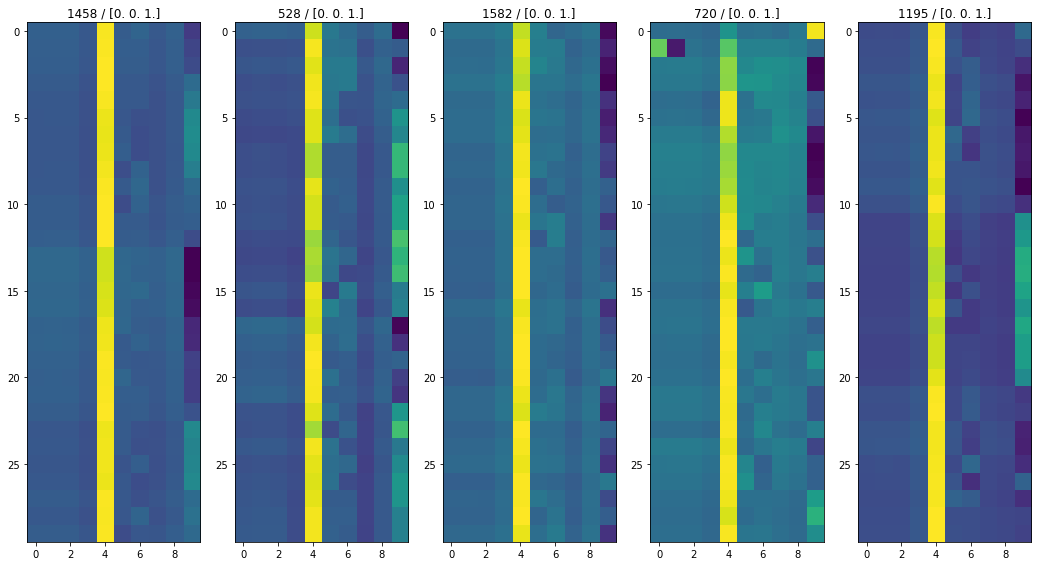

In [43]:
#plt.imshow(train_X[index], norm=norm)
#norm = mlt.colors.Normalize(vmin=0.,vmax=1.)
layer = tf.keras.layers.LayerNormalization(axis=1)
fig=plt.figure(figsize=(18,30))
for i in range(5):
    while (not ready):
        rand = random.randint(0, len(train_y)-1)
        if np.array_equal(train_y[rand],[0., 0., 1.]):
            plt.subplot(1,5,i+1)
            plt.subplot(1,5,i+1)
            
            output = layer(train_X[rand])
            plt.imshow(output)
            #plt.imshow(train_X[rand], norm=norm)
            plt.title(str(rand)+' / '+str(train_y[rand]))
            ready = True
    ready=False

In [ ]:
plt.close('all')

In [ ]:
i=0
layer = tf.keras.layers.LayerNormalization(axis=1)
for x in train_X:
    fig=plt.figure(figsize=(18,30))
    output = layer(x)
    plt.imshow(output)
    plt.title(str(i))
    if (train_y[i]==1.0):
        fig.savefig('train/up/'+str(i)+'.png')
    elif (train_y[i]==-1.0):
        fig.savefig('train/down/'+str(i)+'.png')
    elif (train_y[i]==0):
        fig.savefig('train/const/'+str(i)+'.png')
    plt.close(fig)
    i+=1
plt.close('all')

In [ ]:
i=0
for x in test_X:
    fig=plt.figure(figsize=(18,30))
    output = layer(x)
    plt.imshow(output)
    plt.title(str(i))
    if (test_y[i]==1.0):
        fig.savefig('test/up/'+str(i)+'.png')
    elif (test_y[i]==-1.0):
        fig.savefig('test/down/'+str(i)+'.png')
    elif (test_y[i]==0):
        fig.savefig('test/const/'+str(i)+'.png')
    plt.close(fig)
    i+=1
plt.close('all')

In [ ]:
layer3=tf.keras.layers.LayerNormalization()
output = layer3(train_X[837])
plt.imshow(output)

## =================================================================

In [ ]:
#callbacks = myCallback()
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
        
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [319]:
def variation_calc(a_matrix, Weight):
    line_lenght=(a_matrix.shape)[-2]-1
    variation_matrix=[]
    while line_lenght>0:
        i=0
        variation_line=[]
        for x in a_matrix[line_lenght]:
            var= (((abs(a_matrix[line_lenght][i])/abs(a_matrix[line_lenght-1][i]))-1)) * Weight
            variation_line.append(var)
            i+=1
        variation_matrix.append(variation_line)
        line_lenght-=1
    
    variation_matrix = a_matrix[1:]+(a_matrix[1:]*(variation_matrix))
    return variation_matrix

In [332]:
x_var= variation_calc(x_processed[1],1.2)

In [333]:
x_var=np.array(x_var)

In [354]:
x=[x[8] for x in x_processed[1][1:]]
x_f=[x[8] for x in x_var]

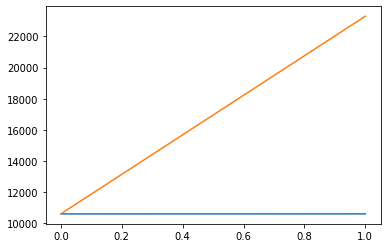

In [357]:
plt.plot(np.arange(2),x[-2:])
plt.plot(np.arange(2),x_f[-2:])

In [52]:
def weights_cal_and_fit(sequencial,X_train, y_train,validation_data, w_cal, w_epochs, MAX_EPOCHS):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
    
        model_loss=np.zeros(w_cal)
        weights_holder=[]
        for i in range(w_cal):
            model=sequencial
            model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9),metrics=["accuracy"])
            temp_history = model.fit(X_train, y_train, epochs=w_epochs,validation_data=validation_data,verbose=0)
            model_loss.put(i, temp_history.history['accuracy'][-1])
            weights_holder.append(model)
        model=weights_holder[np.argmax(model_loss)]
        history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72,validation_data=validation_data)
        return history, model


In [66]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_X[0].shape)))
model.add(tf.keras.layers.LayerNormalization())
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 300)               0         
_________________________________________________________________
layer_normalization_7 (Layer (None, 300)               600       
_________________________________________________________________
lambda_4 (Lambda)            (None, 300, 1)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 300, 64)           4224      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 8,027
Trainable params: 8,027
Non-trainable params: 0
____________________________________________________

In [ ]:
%%time
#KeyboardInterrupt
MAX_EPOCHS=80
history = model.fit(train_X, train_y, epochs=MAX_EPOCHS,batch_size=32, validation_data=(test_X, test_y),verbose=2,shuffle=False)

In [67]:
%%time
history, model= weights_cal_and_fit(model,train_X, train_y,(test_X, test_y), 300, 5, MAX_EPOCHS)

Epoch 1/80
32/32 [==============================] - 5s 168ms/step - loss: 0.3475 - accuracy: 0.8552 - val_loss: 0.4625 - val_accuracy: 0.8140
Epoch 2/80
32/32 [==============================] - 5s 164ms/step - loss: 0.3426 - accuracy: 0.8587 - val_loss: 0.4724 - val_accuracy: 0.8244
Epoch 3/80
32/32 [==============================] - 5s 164ms/step - loss: 0.3422 - accuracy: 0.8623 - val_loss: 0.4687 - val_accuracy: 0.8254
Epoch 4/80
32/32 [==============================] - 5s 166ms/step - loss: 0.3395 - accuracy: 0.8658 - val_loss: 0.4734 - val_accuracy: 0.8264
Epoch 5/80
32/32 [==============================] - 5s 165ms/step - loss: 0.3435 - accuracy: 0.8601 - val_loss: 0.4703 - val_accuracy: 0.8264
Epoch 6/80
32/32 [==============================] - 5s 164ms/step - loss: 0.3414 - accuracy: 0.8614 - val_loss: 0.4615 - val_accuracy: 0.8275
Epoch 7/80
32/32 [==============================] - 5s 167ms/step - loss: 0.3438 - accuracy: 0.8640 - val_loss: 0.4875 - val_accuracy: 0.8120
Epoch 

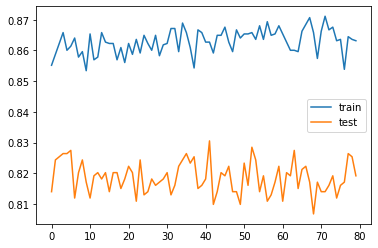

In [68]:
plt.plot(history.history['accuracy'][:], label='train')
plt.plot(history.history['val_accuracy'][:], label='test')
plt.legend()
plt.show()

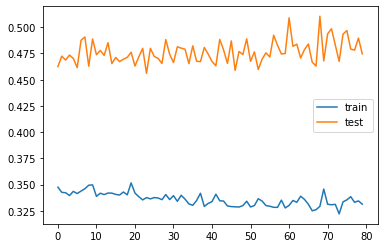

In [69]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [70]:
# Over-sampling model loss: 0.3165 - categorical_crossentropy: 0.2438 - accuracy: 0.9091 - val_loss: 0.7229 - val_categorical_crossentropy: 0.6535 - val_accuracy: 0.7582
model.save('models/conv_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/conv_model\assets


In [71]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LayerNormalization(input_shape=(train_X[0].shape)))

#model.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.15))

model.add(tf.keras.layers.LSTM(32))

model.add(tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.Dense(3, activation= 'softmax'))

#model.add(tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=-1),input_shape=[None]))
#model.add(tf.keras.layers.SimpleRNN(100))
#model.add(tf.keras.layers.Dense(1, activation= 'relu'))
#optimizer = 'adam'
optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalCrossentropy(),"accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization_8 (Layer (None, 30, 10)            20        
_________________________________________________________________
flatten_5 (Flatten)          (None, 300)               0         
_________________________________________________________________
lambda_5 (Lambda)            (None, 300, 1)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 64)           16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [ ]:
%%time
#KeyboardInterrupt
MAX_EPOCHS=80
history = model.fit(train_X, train_y, epochs=MAX_EPOCHS,batch_size=32, validation_data=(test_X, test_y),verbose=2,shuffle=False)

In [ ]:
%%time
history, model= weights_cal_and_fit(model,train_X, train_y,(test_X, test_y), 300, 5, MAX_EPOCHS)

In [ ]:
plt.plot(history.history['accuracy'][:], label='train')
plt.plot(history.history['val_accuracy'][:], label='test')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
# Over-sampling model loss: 0.3165 - categorical_crossentropy: 0.2438 - accuracy: 0.9091 - val_loss: 0.7229 - val_categorical_crossentropy: 0.6535 - val_accuracy: 0.7582
model.save('models/LSTM_model')

In [ ]:
import os
os.system('shutdown -s')

In [ ]:
# LSTM
t1 = thread_training.thread_training(model, train_X, train_y, 1000, 72, (test_X, test_y), 1, False) 
t1_history = t1.start()

In [ ]:
# RNN
t2 = thread_training.thread_training(model, train_X, train_y, 1000, 72, (test_X, test_y), 1, False) 
t2_history = t2.start()

In [ ]:
temp_x = train_X_os
temp_y = train_y_os

In [ ]:
x_evaluate = x_processed
y_evaluate = y_processed

In [ ]:
model.evaluate(x_evaluate, y_evaluate, batch_size=144)

In [ ]:
yhat = model.predict(test_X)

In [ ]:
ps = yhat[:100]
ts = test_y[:100]

In [ ]:
plt.figure(figsize=(20, 6))
#dlm.plot_series(np.arange(len(ps)), ps[:])
plt.subplot(211)
plt.plot(np.arange(len(ps)), [x[0] for x in ps[:]])
#plt.subplot(212)
plt.plot(np.arange(len(ts)), [x[0] for x in ts[:]])
plt.grid()

In [ ]:
plt.figure(figsize=(20, 6))
#dlm.plot_series(np.arange(len(ps)), ps[:])
plt.subplot(211)
plt.plot(np.arange(len(ps)),ps)
#plt.subplot(212)
plt.plot(np.arange(len(ts)),ts)
plt.grid(True)

In [92]:
loaded_model = tf.keras.models.load_model('models/conv_model')
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 300)               0         
_________________________________________________________________
layer_normalization_7 (Layer (None, 300)               600       
_________________________________________________________________
lambda_4 (Lambda)            (None, 300, 1)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 300, 64)           4224      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 8,027
Trainable params: 8,027
Non-trainable params: 0
____________________________________________________

In [93]:
conv_model = loaded_model

In [71]:
history = conv_model.fit(train_X, train_y, epochs=20,batch_size=32, validation_data=(test_X, test_y),verbose=2,shuffle=False)

Epoch 1/20
11/11 - 2s - loss: 0.3040 - accuracy: 0.8563 - val_loss: 0.3366 - val_accuracy: 0.9167
Epoch 2/20
11/11 - 2s - loss: 0.5046 - accuracy: 0.8353 - val_loss: 0.4522 - val_accuracy: 0.9097
Epoch 3/20
11/11 - 2s - loss: 0.3537 - accuracy: 0.8593 - val_loss: 0.3870 - val_accuracy: 0.9167
Epoch 4/20
11/11 - 2s - loss: 0.3392 - accuracy: 0.8593 - val_loss: 0.3774 - val_accuracy: 0.9167
Epoch 5/20
11/11 - 2s - loss: 0.3343 - accuracy: 0.8653 - val_loss: 0.3358 - val_accuracy: 0.9097
Epoch 6/20
11/11 - 2s - loss: 0.4101 - accuracy: 0.8383 - val_loss: 0.4060 - val_accuracy: 0.9097
Epoch 7/20
11/11 - 2s - loss: 0.2836 - accuracy: 0.8772 - val_loss: 0.3612 - val_accuracy: 0.9167
Epoch 8/20
11/11 - 2s - loss: 0.2747 - accuracy: 0.8982 - val_loss: 0.3372 - val_accuracy: 0.9306
Epoch 9/20
11/11 - 2s - loss: 0.2727 - accuracy: 0.8952 - val_loss: 0.3718 - val_accuracy: 0.8958
Epoch 10/20
11/11 - 2s - loss: 0.2281 - accuracy: 0.9132 - val_loss: 0.3352 - val_accuracy: 0.9236
Epoch 11/20
11/11 -

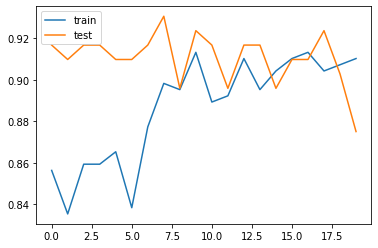

In [72]:
plt.plot(history.history['accuracy'][:], label='train')
plt.plot(history.history['val_accuracy'][:], label='test')
plt.legend()
plt.show()

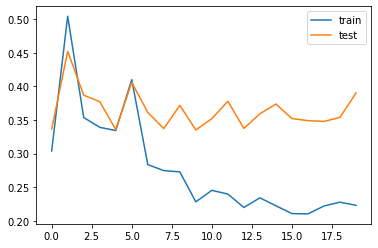

In [73]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [101]:
conv_model.evaluate(x_processed,y_processed)

15/15 [==============================] - 1s 35ms/step - loss: 0.5152 - accuracy: 0.7803


[0.5151620507240295, 0.7803347110748291]

In [107]:
yhat = conv_model.predict(x_processed)

In [108]:
ps = yhat[:100]
ts = y_processed[:100]

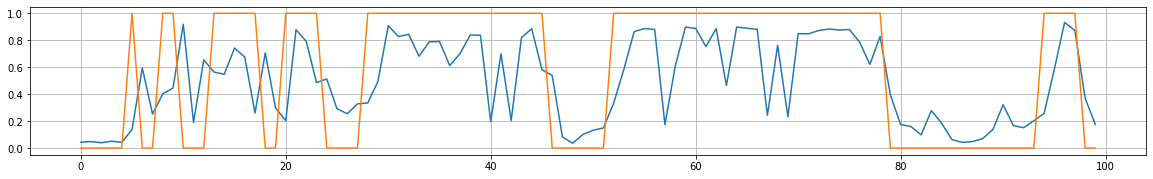

In [119]:
plt.figure(figsize=(20, 6))
#dlm.plot_series(np.arange(len(ps)), ps[:])
plt.subplot(211)
plt.plot(np.arange(len(ps)), [x[2] for x in ps[:]])
#plt.subplot(212)
plt.plot(np.arange(len(ts)), [x[2] for x in ts[:]])
plt.grid()

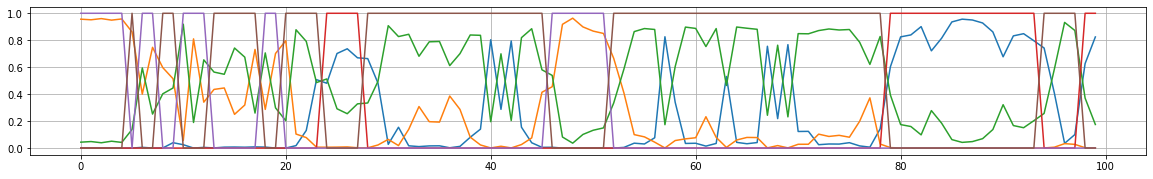

In [110]:
plt.figure(figsize=(20, 6))
#dlm.plot_series(np.arange(len(ps)), ps[:])
plt.subplot(211)
plt.plot(np.arange(len(ps)),ps)
#plt.subplot(212)
plt.plot(np.arange(len(ts)),ts)
plt.grid(True)

In [102]:
len(x_processed)

478

In [103]:
len(x_processed)*0.7803

372.9834

## =================================================================

## =================================================================

In [ ]:
t1 = tml.thread_main_loop(model, 60, 9, 0, "0", "1",1) #azul new_dt
t1.start()

In [ ]:
t1.kill()

In [ ]:
t1.join()